In [2]:
%matplotlib inline
from qiskit.visualization import plot_histogram
from qiskit import QuantumCircuit
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.transpiler import generate_preset_pass_manager
from qiskit.visualization import plot_histogram

In [3]:
secretNumber = '10101010100'

In [4]:
circuit = QuantumCircuit(len(secretNumber)+1,len(secretNumber))

In [5]:
circuit.h(range(len(secretNumber)))
circuit.x(len(secretNumber))
circuit.h(len(secretNumber))

circuit.barrier()

for index, one in enumerate(reversed(secretNumber)):
    print(f"index{index} is {one}")
    if one == "1":
        circuit.cx(index,len(secretNumber))

circuit.barrier()

circuit.h(range(len(secretNumber)))

circuit.barrier()

circuit.measure(range(len(secretNumber)),range(len(secretNumber)))

index0 is 0
index1 is 0
index2 is 1
index3 is 0
index4 is 1
index5 is 0
index6 is 1
index7 is 0
index8 is 1
index9 is 0
index10 is 1


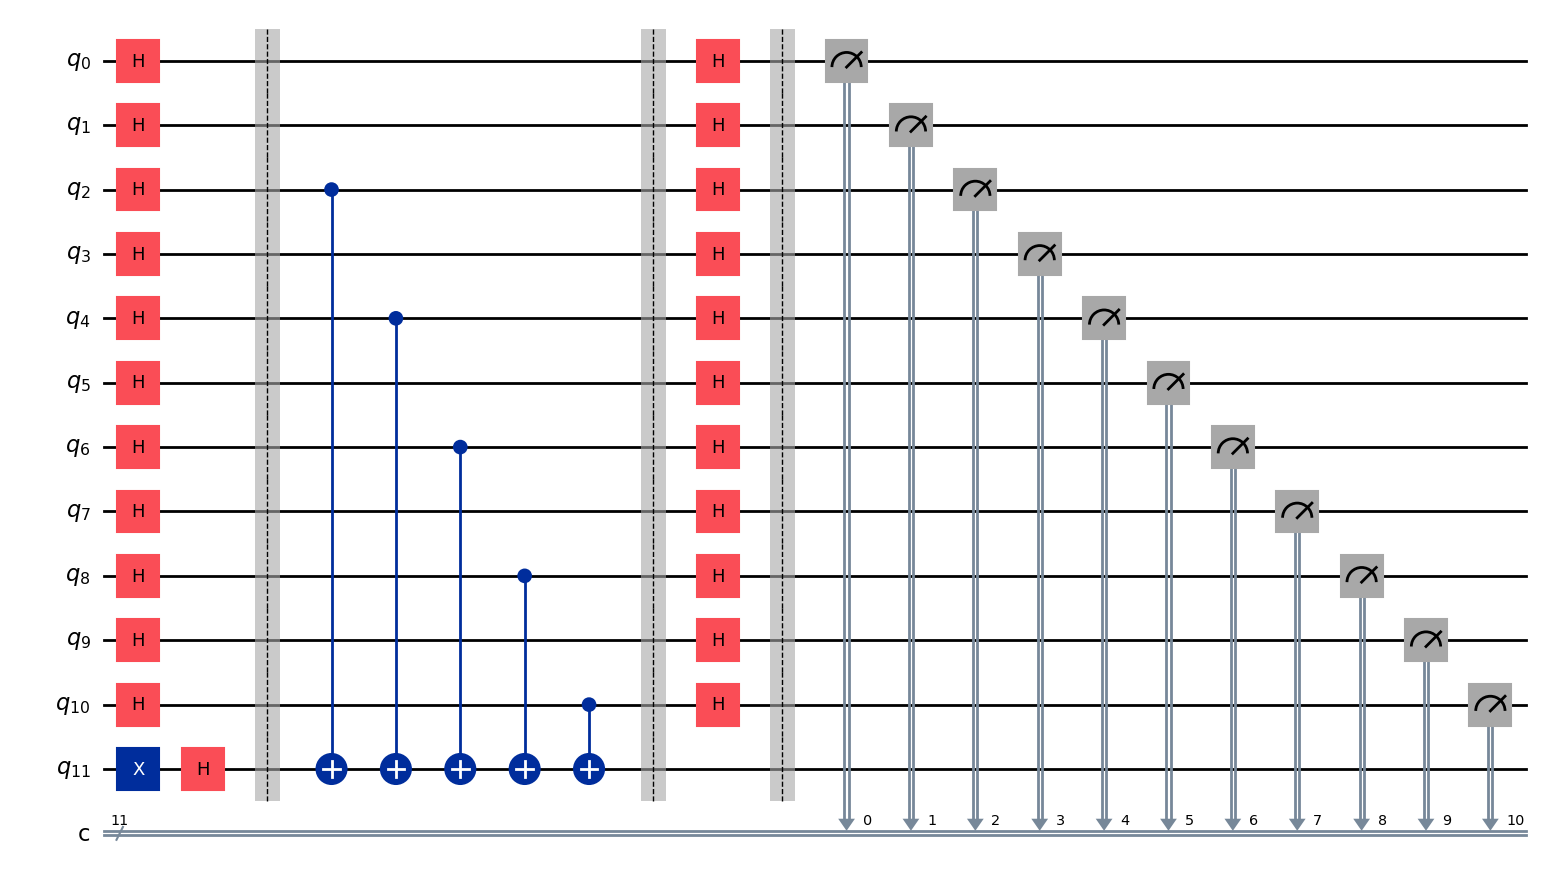

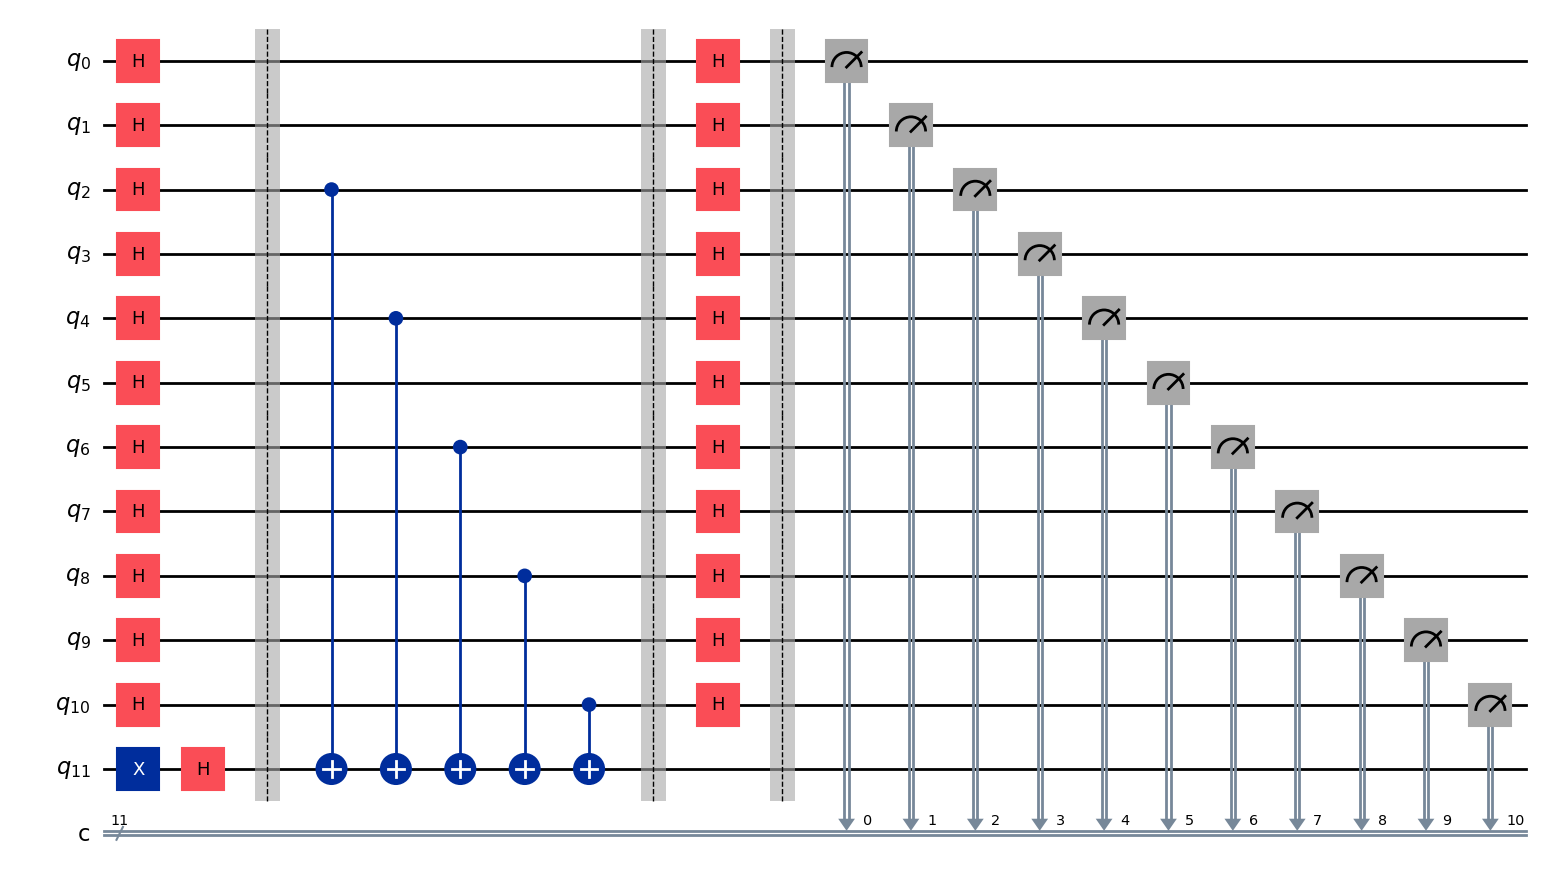

In [6]:
circuit.draw(output='mpl')

In [7]:
service = QiskitRuntimeService()
backend = service.least_busy(simulator=False, operational=True)

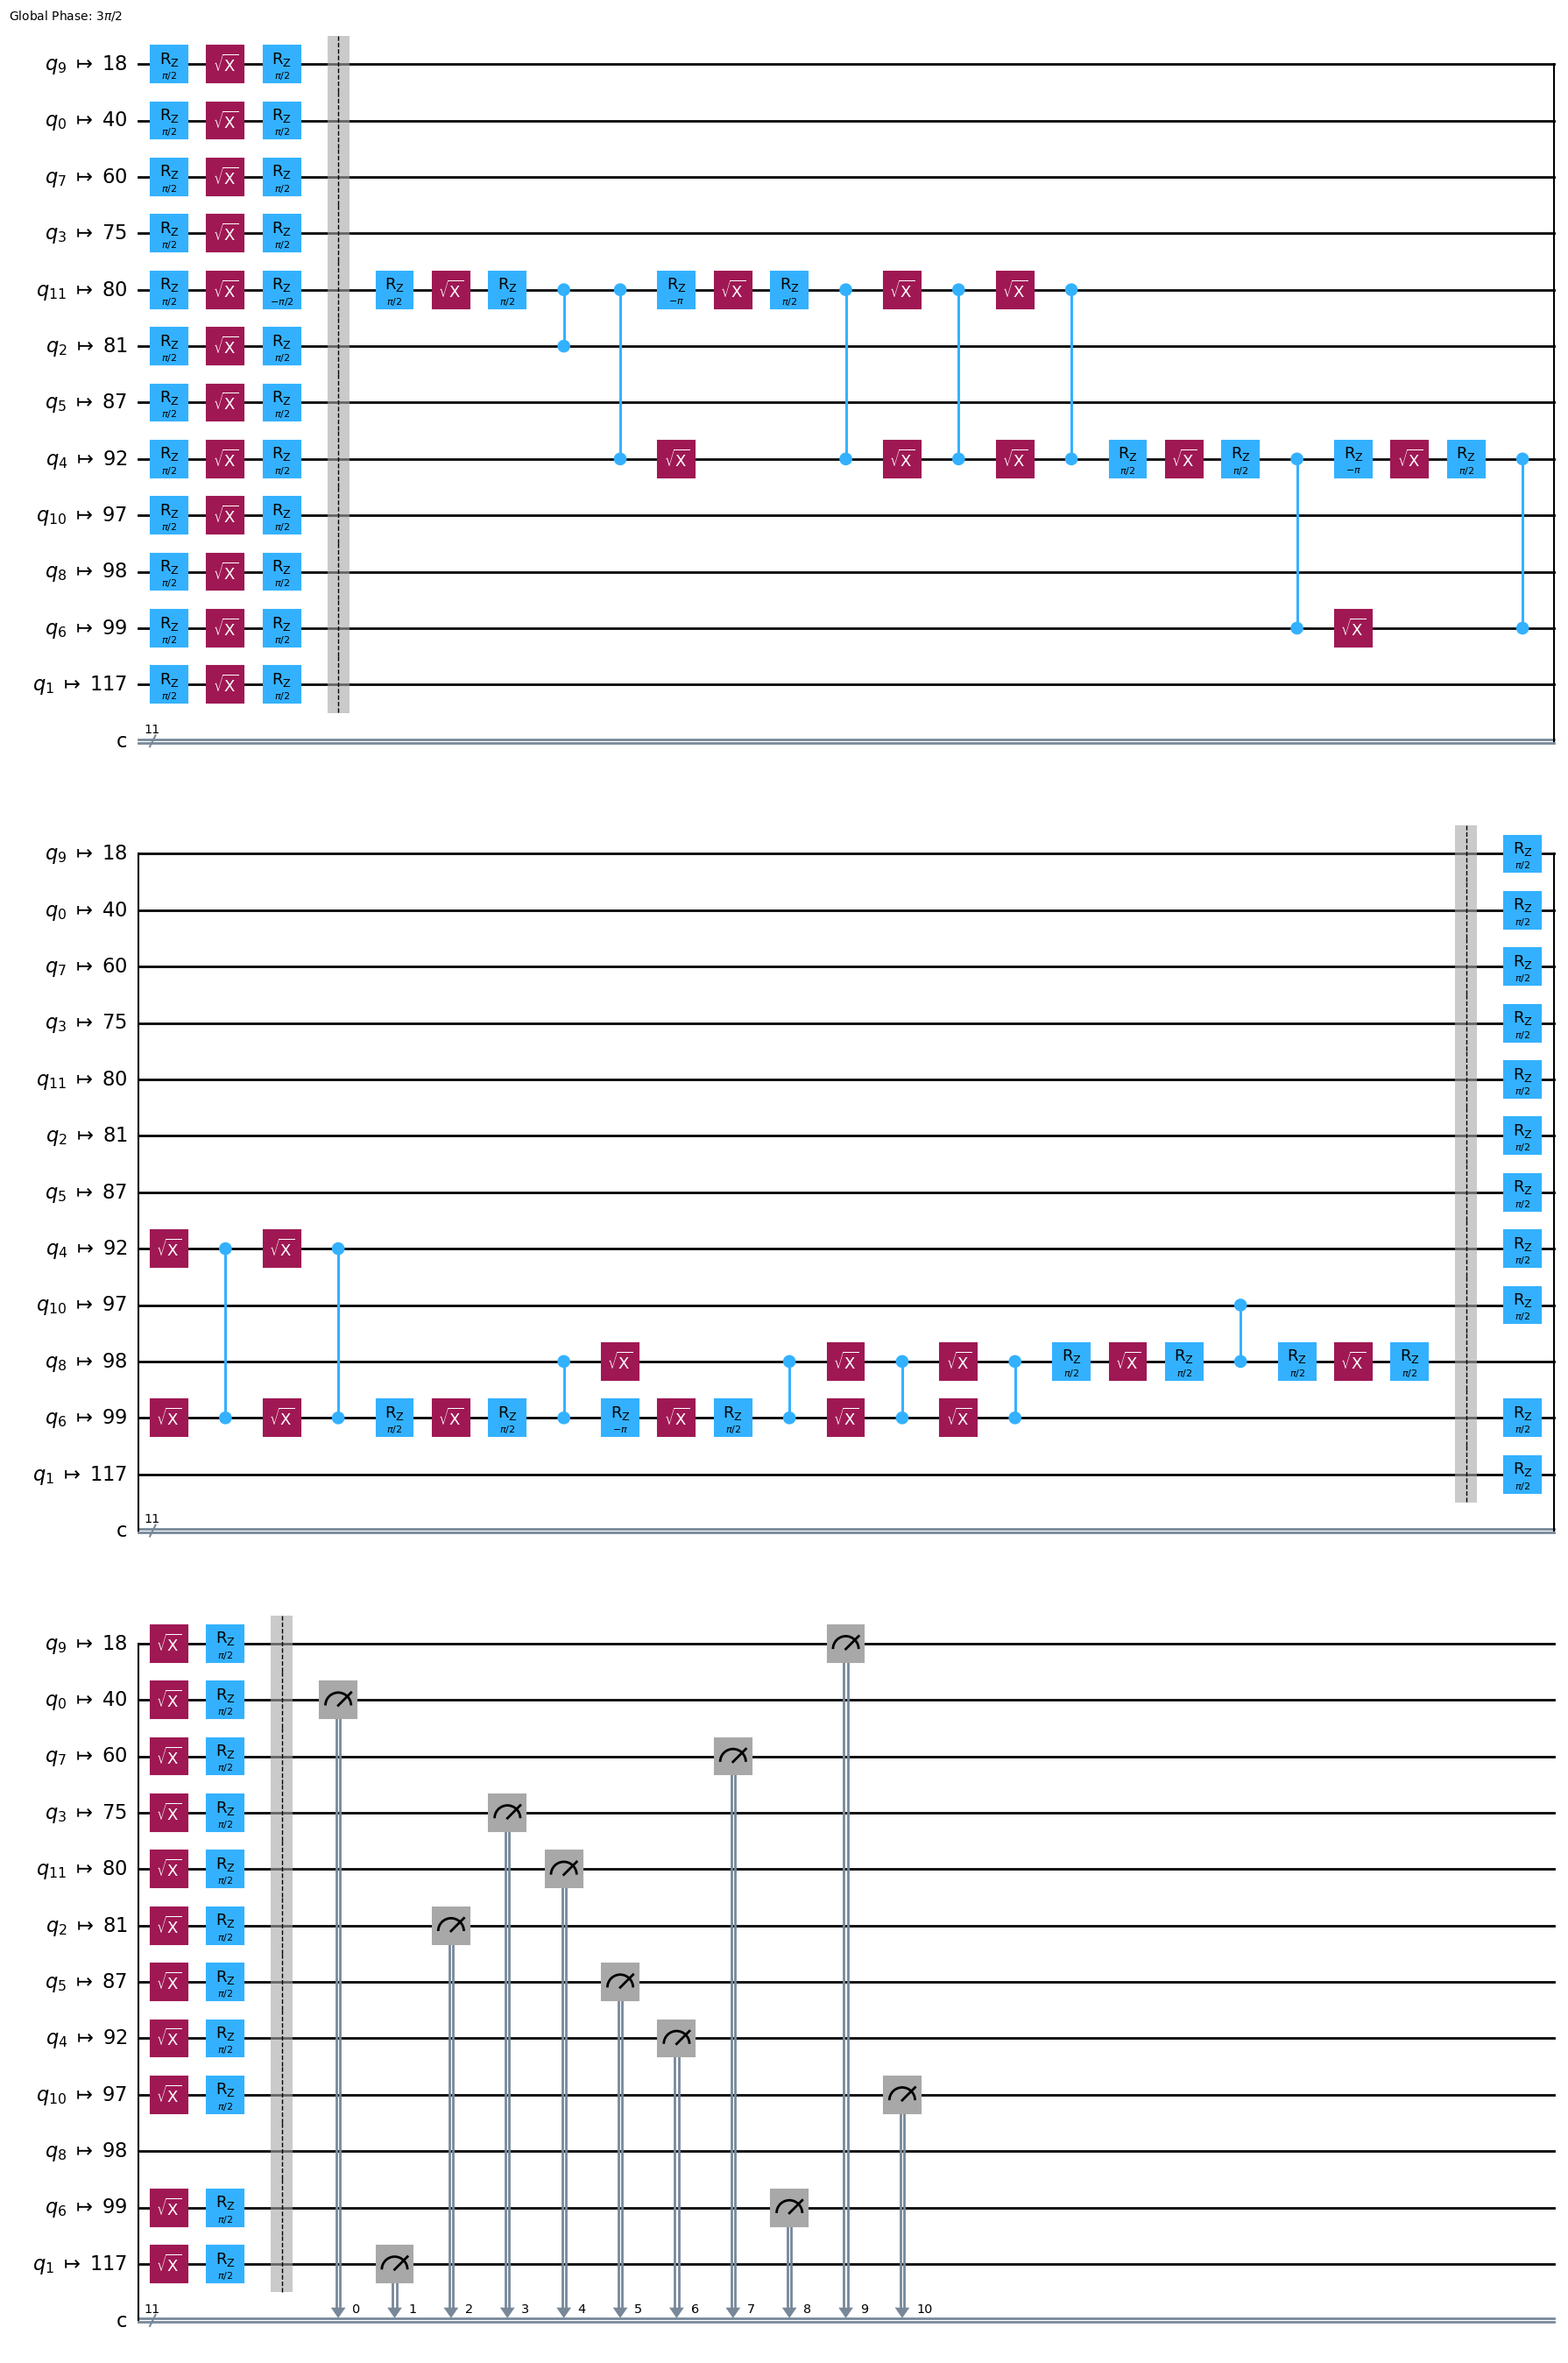

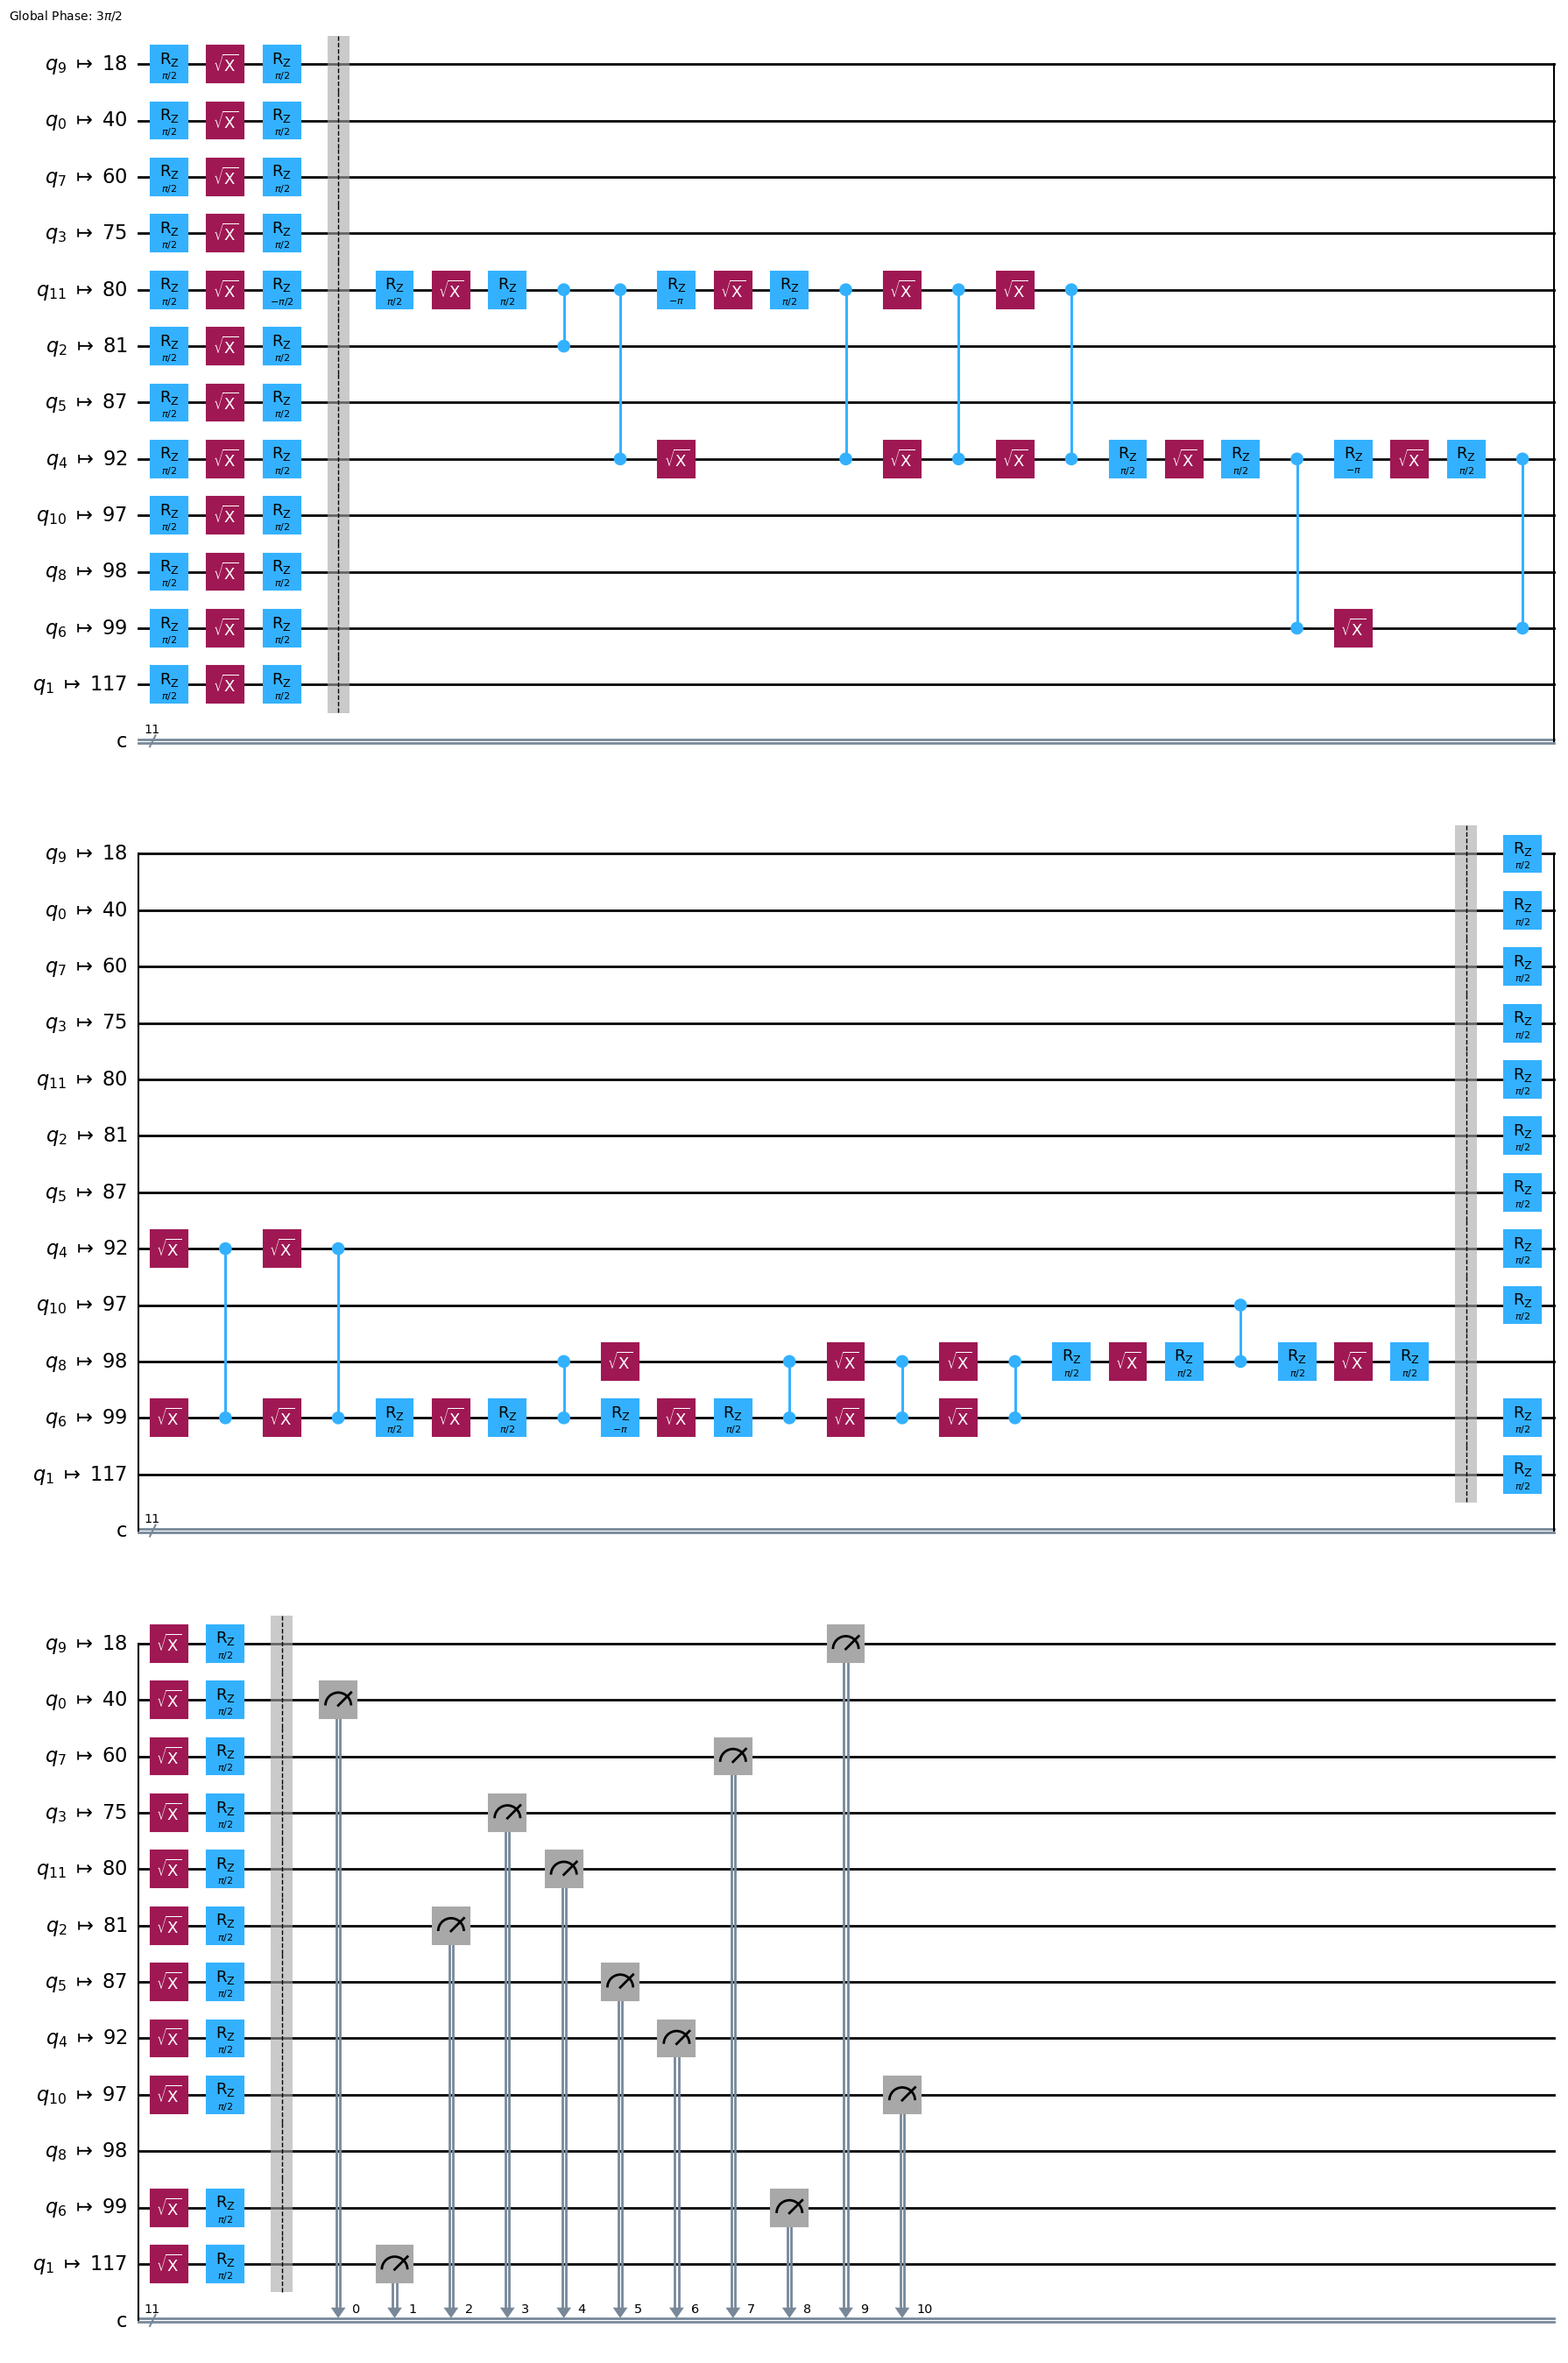

In [8]:
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(circuit)
 
isa_circuit.draw("mpl", idle_wires=False)

In [9]:
sampler = Sampler(mode=backend)
jobSampler = sampler.run([isa_circuit], shots=1024)
result = jobSampler.result()
counts = result[0].data.c.get_counts()
print(counts)

{'10101010100': 718, '10101000100': 23, '00101010100': 66, '10001010100': 19, '10101010110': 16, '00000010100': 12, '00000000000': 12, '10110010100': 1, '10111010100': 6, '00000000100': 4, '10000010100': 2, '00001010100': 10, '10101110100': 8, '10101011100': 6, '10101010000': 16, '00100010100': 3, '10100010100': 20, '10101010101': 20, '00000011000': 1, '00000010000': 8, '10101000000': 3, '11101010100': 14, '10100010101': 1, '00101010110': 3, '00101000100': 4, '10101010010': 1, '10101000110': 1, '00111010100': 2, '10100000100': 4, '10001000100': 1, '00101010101': 3, '10100010000': 1, '10100000000': 1, '00101011100': 3, '10111010000': 1, '10001010000': 1, '10000000100': 1, '00001000101': 1, '00001010000': 2, '00110000000': 1, '10011010100': 1, '10101000101': 1, '10100010010': 1, '10100010110': 1}


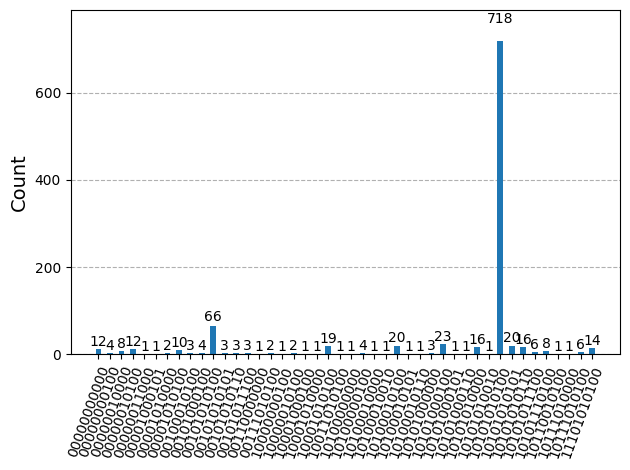

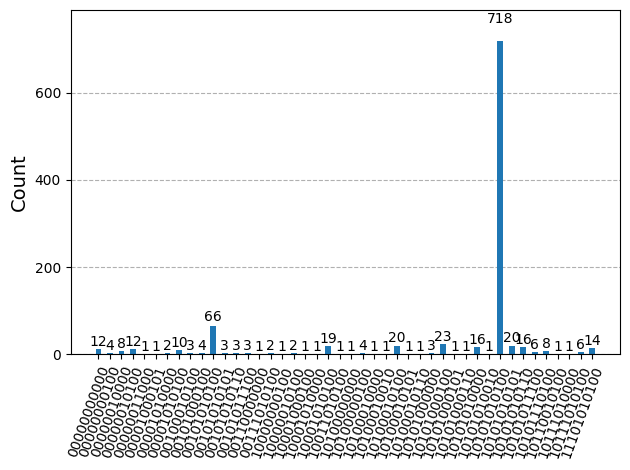

In [10]:
plot_histogram(counts)